# Data Understanding

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../input/indonesia-tourism-destination"

info_tourism = pd.read_csv(f"tourism_with_id.csv")
tourism_rating = pd.read_csv(f"tourism_rating.csv")
users = pd.read_csv(f"user.csv")

In [26]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
26,27,Sea World,Seaworld Indonesia adalah sebuah miniatur peso...,Taman Hiburan,Jakarta,115000,4.5,180.0,"{'lat': -6.126477500000001, 'lng': 106.842963}",-6.126478,106.842963,NaN,27
178,179,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
114,115,Monumen Sanapati,Monumen Sanapati dibangun untuk memeringati 50...,Budaya,Yogyakarta,15000,4.3,NaN,"{'lat': -7.788172800000001, 'lng': 110.3715403}",-7.788173,110.371540,NaN,115
213,214,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,240.0,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494,NaN,214
175,176,Museum Gunung Merapi,Museum Gunung Merapi (bahasa Jawa: ꧋ꦩꦸꦱꦶꦪꦸꦩ꧀​ ...,Budaya,Yogyakarta,10000,4.4,60.0,"{'lat': -7.615927200000001, 'lng': 110.4243329}",-7.615927,110.424333,NaN,176


In [27]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
6262,188,58,4
4658,142,406,1
4985,150,166,2
9950,299,8,4
202,7,77,3


In [28]:
users.sample(5)

,User_Id,Location,Age
238,239,"Kota Gede, DIY",23
175,176,"Depok, Jawa Barat",31
110,111,"Serang, Banten",38
173,174,"Sragen, Jawa Tengah",32
274,275,"Lampung, Sumatera Selatan",34


In [29]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [30]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [31]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [32]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [33]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [34]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [35]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [36]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [37]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [38]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [39]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [40]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [41]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [42]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [43]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [44]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [45]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


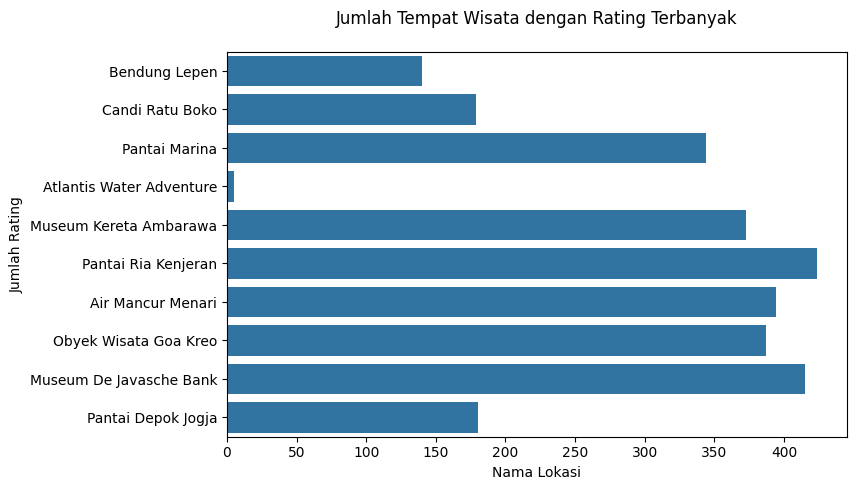

In [46]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', left_on='id', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id', y='Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

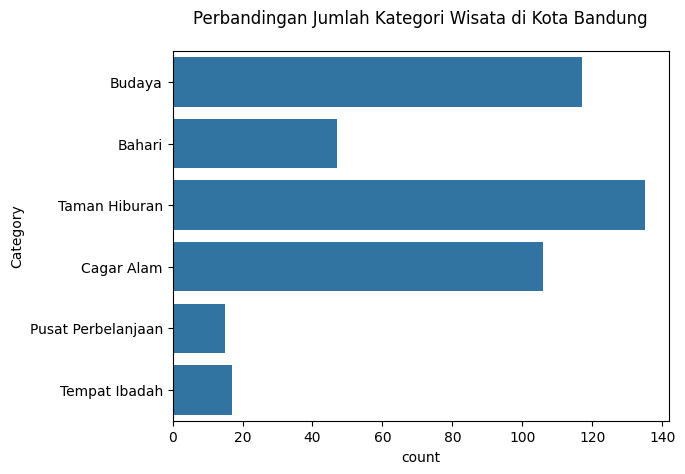

In [47]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

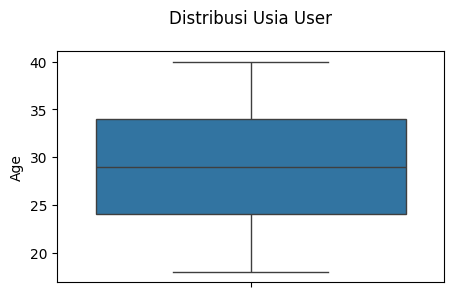

In [48]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

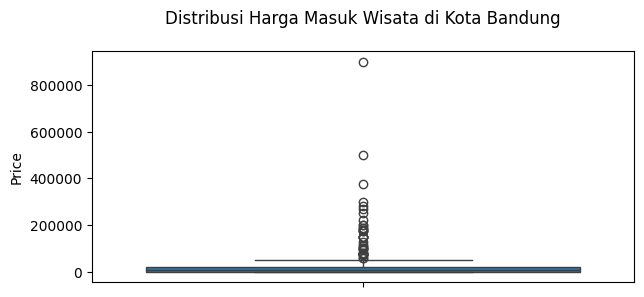

In [49]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

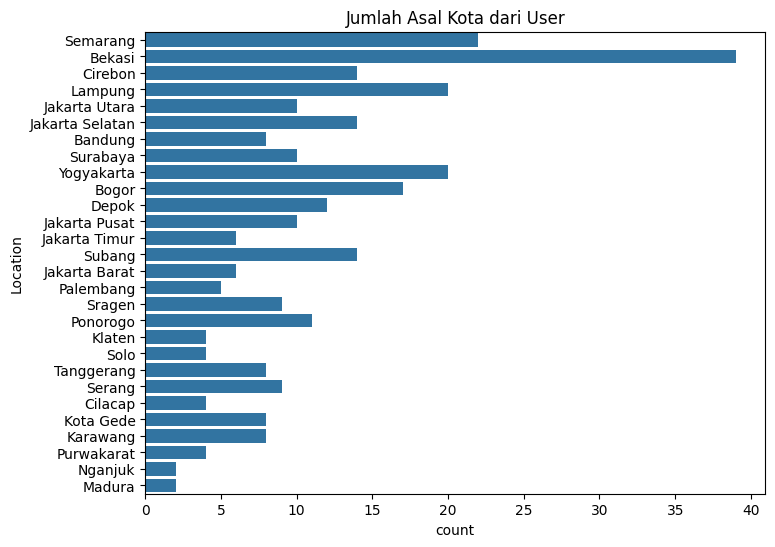

In [50]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#### 

# Content Based Filtering

In [51]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
197,12,Pulau Pari,Bahari,Pulau Pari adalah sebuah pulau yang terletak d...,Jakarta,Jakarta Bahari
36,111,Puncak Pinus Becici,Taman Hiburan,Puncak Pinus Becici atau Puncak Becici merupak...,Yogyakarta,Yogyakarta Taman Hiburan
134,257,Monumen Bandung Lautan Api,Budaya,"Monumen Bandung Lautan Api, merupakan monumen ...",Bandung,Bandung Budaya
340,29,Wisata Kuliner Pecenongan,Pusat Perbelanjaan,Pecenongan merupakan salah satu surga kuliner ...,Jakarta,Jakarta Pusat Perbelanjaan
413,351,Old City 3D Trick Art Museum,Budaya,Destinasi wisata kekinian satu ini memang teng...,Semarang,Semarang Budaya


## TF-IDF Vectorizer

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [53]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(437, 15)

In [54]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [55]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Taman Ismail Marzuki,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Goa Pindul,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Candi Gedong Songo,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Wisata Mangrove Tapak,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
Wisata Lereng Kelir,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Cosine Similarity

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [57]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Taman Kupu-Kupu Cihanjuang,Pasar Tanah Abang,Galeri Nasional Indonesia,Candi Gedong Songo,Pantai Depok Jogja
name,,,,,
Watu Gunung Ungaran,0.666667,0.0,0.000000,0.408248,0.0
Pecinan Glodok,0.000000,1.0,0.408248,0.000000,0.0
Candi Sewu,0.000000,0.0,0.500000,0.500000,0.5
Jendela Alam,0.333333,0.0,0.000000,0.000000,0.0
Lawang Sewu,0.000000,0.0,0.500000,1.000000,0.0
Kampung Wisata Dipowinatan,0.000000,0.0,0.500000,0.500000,0.5
Curug Cilengkrang,1.000000,0.0,0.000000,0.000000,0.0
Happyfarm Ciwidey,1.000000,0.0,0.000000,0.000000,0.0
Kebun Binatang Surabaya,0.666667,0.0,0.000000,0.000000,0.0


## Recommendation

In [58]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [59]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [60]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


# Collaborative Filtering

In [61]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [62]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

In [63]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [64]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [65]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [66]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [67]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [68]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

In [69]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [70]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [71]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6943 - root_mean_squared_error: 0.3444 - val_loss: 0.6950 - val_root_mean_squared_error: 0.3461
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6889 - root_mean_squared_error: 0.3412 - val_loss: 0.6952 - val_root_mean_squared_error: 0.3463
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6834 - root_mean_squared_error: 0.3358 - val_loss: 0.6959 - val_root_mean_squared_error: 0.3467
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6803 - root_mean_squared_error: 0.3397 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3478
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6709 - root_mean_squared_error: 0.3297 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3472
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6716 - root_mean_squared_error: 0.3301 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3478
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

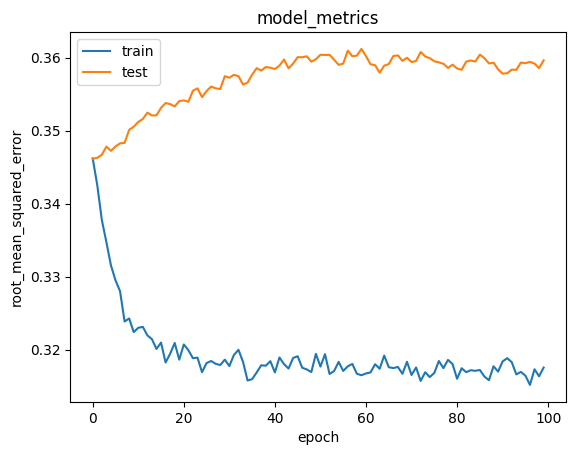

In [72]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [74]:
place_df = tourism_new
df = pd.read_csv(f'tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [75]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Showing recommendations for users: 256
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
5,312,Taman Hutan Raya Ir. H. Juanda,Cagar Alam,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Bandung,Bandung Cagar Alam
26,307,Perkebunan Teh Malabar,Cagar Alam,Salah satu perkebunan teh yang cukup terkenal ...,Bandung,Bandung Cagar Alam
36,111,Puncak Pinus Becici,Taman Hiburan,Puncak Pinus Becici atau Puncak Becici merupak...,Yogyakarta,Yogyakarta Taman Hiburan
105,395,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya,Surabaya Taman Hiburan
324,425,Waterpark Kenjeran Surabaya,Taman Hiburan,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Surabaya Taman Hiburan


In [76]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
106,300,Sanghyang Heuleut,Cagar Alam,Danau yang satu ini memiliki air jernih bernua...,Bandung,Bandung Cagar Alam
236,293,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung,Bandung Taman Hiburan
237,422,Monumen Jalesveva Jayamahe,Budaya,Monumen Jalesveva Jayamahe atau Monjaya adalah...,Surabaya,Surabaya Budaya
290,279,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Bandung Tempat Ibadah
309,295,Museum Nike Ardilla,Budaya,Museum Nike Ardilla diresmikan atau dibuka unt...,Bandung,Bandung Budaya
341,60,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Jakarta Budaya
380,431,Taman Hiburan Rakyat,Taman Hiburan,Taman Hiburan Rakyat atau THR tentunya sudah t...,Surabaya,Surabaya Taman Hiburan
384,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari
385,282,Curug Cilengkrang,Cagar Alam,Curug Cilengkrang bisa menjadi pilihan tujuan ...,Bandung,Bandung Cagar Alam
422,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam
